In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv("EmployeeData(new).csv")
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'dept' : 'department',
                        'left' : 'turnover'
                        })
df.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,salary,department
0,0.38,0.53,2,157,3,0,1,0,low,sales
1,0.80,0.86,5,262,6,0,1,0,medium,sales
2,0.11,0.88,7,272,4,0,1,0,medium,sales
3,0.72,0.87,5,223,5,0,1,0,low,sales
4,0.37,0.52,2,159,3,0,1,0,low,sales


# Feature Importance using Decision Tree Classifier

In [ ]:
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = (12,6)
df.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,salary,department
0,0.38,0.53,2,157,3,0,1,0,low,sales
1,0.80,0.86,5,262,6,0,1,0,medium,sales
2,0.11,0.88,7,272,4,0,1,0,medium,sales
3,0.72,0.87,5,223,5,0,1,0,low,sales
4,0.37,0.52,2,159,3,0,1,0,low,sales


In [ ]:
# Implementing label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['salary'] = labelencoder.fit_transform(df['salary'].astype('category'))
df['department']= labelencoder.fit_transform(df['department'].astype('category'))
df.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,salary,department
0,0.38,0.53,2,157,3,0,1,0,1,7
1,0.80,0.86,5,262,6,0,1,0,2,7
2,0.11,0.88,7,272,4,0,1,0,2,7
3,0.72,0.87,5,223,5,0,1,0,1,7
4,0.37,0.52,2,159,3,0,1,0,1,7


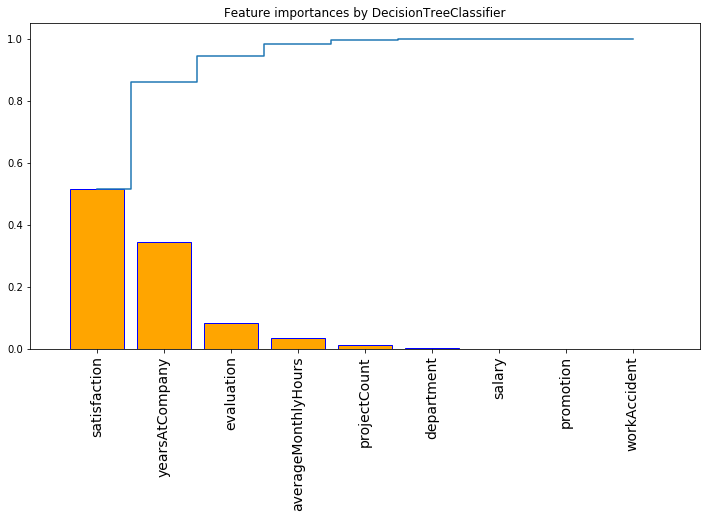

In [ ]:
# Splitting the data into train and test splits
import numpy as np
target = 'turnover'
X = df.drop('turnover',axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state = 0, stratify = y)
dtree = tree.DecisionTreeClassifier(class_weight="balanced",min_weight_fraction_leaf=0.01)
dtree = dtree.fit(X_train,y_train)

# plot the importances
importances = dtree.feature_importances_
feat_names = df.drop(['turnover'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='orange',  align="center",edgecolor = 'blue')
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

# Model 1: Logistic Regression

In [ ]:
import pandas as pd 
df = pd.read_csv("EmployeeData(new).csv")
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'dept' : 'department',
                        'left' : 'turnover'
                        })
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['salary'] = labelencoder.fit_transform(df['salary'].astype('category'))
df['department']= labelencoder.fit_transform(df['department'].astype('category'))

In [ ]:
from sklearn.model_selection import train_test_split
target = 'turnover'
X = df.drop('turnover',axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.95,random_state = 0, stratify = y)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
print('Logistic Regression Accuracy: %.3f' %(accuracy_score(y_test, LR.predict(X_test))))

Logistic Regression Accuracy: 0.769


# Model 2: Support Vector Machine

In [ ]:
import pandas as pd 
from sklearn.model_selection import train_test_split
df = pd.read_csv("EmployeeData(new).csv")
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'dept' : 'department',
                        'left' : 'turnover'
                        })
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['salary'] = labelencoder.fit_transform(df['salary'].astype('category'))
df['department']= labelencoder.fit_transform(df['department'].astype('category'))

target = 'turnover'
X = df.drop('turnover',axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.95,random_state = 0, stratify = y)

In [ ]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [ ]:
from sklearn.metrics import accuracy_score
print("Support Vector Machine Accuracy: %.3f" %(accuracy_score(y_test, SVM.predict(X_test))))

Support Vector Machine Accuracy: 0.875


# Model 3: Random Forest Classifier

In [ ]:
import pandas as pd 
from sklearn.model_selection import train_test_split
df = pd.read_csv("EmployeeData(new).csv")
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'dept' : 'department',
                        'left' : 'turnover'
                        })
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['salary'] = labelencoder.fit_transform(df['salary'].astype('category'))
df['department']= labelencoder.fit_transform(df['department'].astype('category'))

target = 'turnover'
X = df.drop('turnover',axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.95,random_state = 0, stratify = y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
print("Random Forest Accuracy: %.3f" %(accuracy_score(y_test, RFC.predict(X_test))))

Random Forest Accuracy: 0.967


#### Using 10 fold Cross-Validation to train our Random Forest  Model

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier 
kfold = model_selection.KFold(n_splits = 10,random_state = 42)
model_CV = RandomForestClassifier(class_weight='balanced')
results = model_selection.cross_val_score(model_CV,X_train,y_train,cv = kfold, scoring = 'roc_auc')
print("Random Forest Accuracy: %.3f (%.3f)" %(results.mean(), results.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

Random Forest Accuracy: 0.973 (0.021)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Model 4: Gradient Boosting Classifier 

In [ ]:
import pandas as pd 
from sklearn.model_selection import train_test_split
df = pd.read_csv("EmployeeData(new).csv")
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'dept' : 'department',
                        'left' : 'turnover'
                        })
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['salary'] = labelencoder.fit_transform(df['salary'].astype('category'))
df['department']= labelencoder.fit_transform(df['department'].astype('category'))

target = 'turnover'
X = df.drop('turnover',axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.95,random_state = 0, stratify = y)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
print("Gradient Boosting Classifier Accuracy: %.3f" %(accuracy_score(y_test, GBC.predict(X_test))))

Gradient Boosting Classifier Accuracy: 0.969


#### Using 10 fold Cross-Validation to train our Gradient Boosting Model

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier 
kfold = model_selection.KFold(n_splits = 10,random_state = 42)
model_CV = GradientBoostingClassifier()
results = model_selection.cross_val_score(model_CV,X_train,y_train,cv = kfold, scoring = 'roc_auc')
print("Gradient Boosting Accuracy: %.3f (%.3f)" %(results.mean(), results.std()))

Gradient Boosting Accuracy: 0.985 (0.008)


##### From the above analysis we can say that Random Forest Classifier and Gradient Boosting Classifier work the best among the 4 of them with 
##### an accuracy of  0.97 and 0.969 respectively. 
##### We then apply 10 fold cross validation to train these two models and the final accuracy we get is 
##### Random Forest Classifier (0.978)  and  Gradient Boosting Classifier (0.985)

# Precision and Recall:

### Random Forest

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,RFC.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     10857
           1       0.96      0.90      0.93      3393

   micro avg       0.97      0.97      0.97     14250
   macro avg       0.97      0.94      0.95     14250
weighted avg       0.97      0.97      0.97     14250



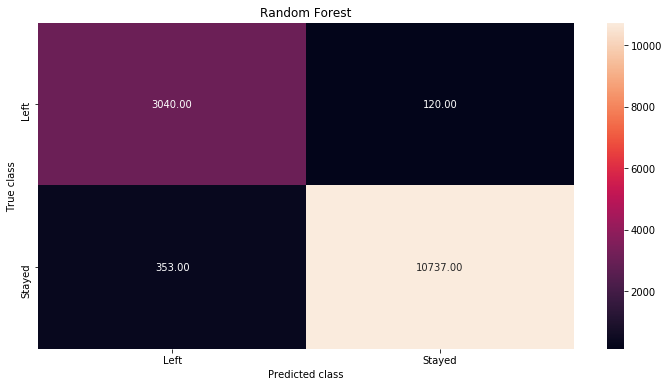

In [ ]:
y_pred = RFC.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
forest_cm = confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')
plt.show()

#### Recall       : 3071 out of 3393 = 90.5%
#### Precision : 3071 out of 3181 = 96.5%

### Gradient Boosting Classifier 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,GBC.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     10857
           1       0.94      0.93      0.93      3393

   micro avg       0.97      0.97      0.97     14250
   macro avg       0.96      0.96      0.96     14250
weighted avg       0.97      0.97      0.97     14250



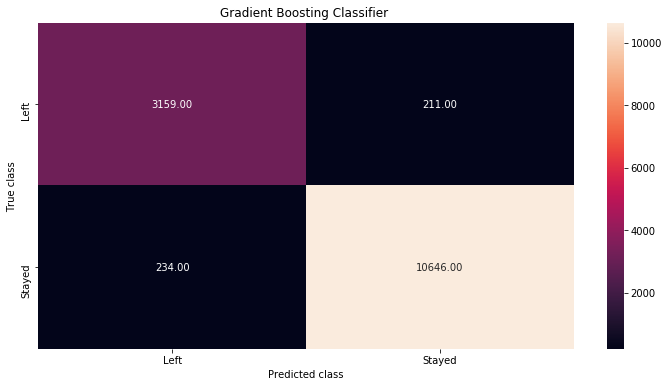

In [ ]:
y_pred = GBC.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
forest_cm = confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Gradient Boosting Classifier ')
plt.savefig('gradient_boosting_classifier')
plt.show()

#### Recall       : 3159 out of 3393 = 93.1%
#### Precision : 3159 out of 3370 = 93.7%

### Support Vector Machine

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,SVM.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     10857
           1       0.81      0.61      0.70      3393

   micro avg       0.87      0.87      0.87     14250
   macro avg       0.85      0.78      0.81     14250
weighted avg       0.87      0.87      0.87     14250



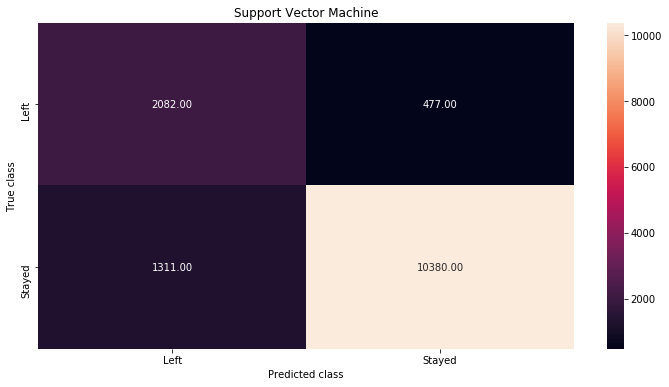

In [ ]:
y_pred = SVM.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
forest_cm = confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')
plt.show()

#### Recall       : 2082 out of 3393 = 61.3%
#### Precision : 2082 out of 2559 = 81.3%

### Logistic Regression

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,LR.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     10857
           1       0.53      0.25      0.34      3393

   micro avg       0.77      0.77      0.77     14250
   macro avg       0.67      0.59      0.60     14250
weighted avg       0.74      0.77      0.74     14250



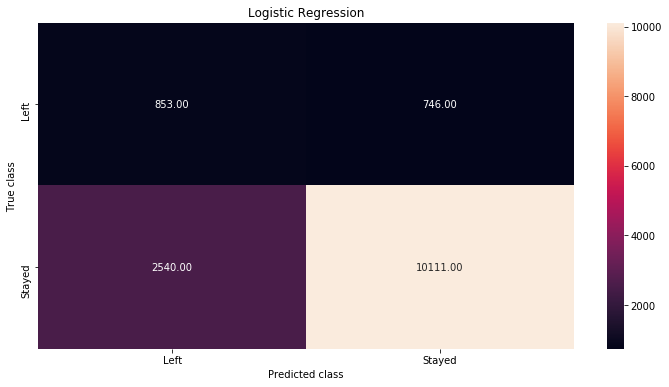

In [ ]:
y_pred = LR.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
forest_cm = confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')
plt.show()

#### Recall       : 853 out of 3393 =  25.1%
#### Precision : 853 out of 1599 =  53.3%

In [ ]:
# Compare the Logistic Regression Model V.S. SVM Model V.S. Random Forest Model V.S. Gradient Boosting Classifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# NOTE: By adding in "class_weight = balanced", the Logistic Auc increased by about 10%! This adjusts the threshold value
logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))

# Support Vector Machine
from sklearn.svm import SVC
svm = SVC(probability = True)
svm.fit(X_train,y_train)
print ("\n\n ---Logistic Model---")
svm_roc_auc = roc_auc_score(y_test, svm.predict(X_test))
print ("Support Vector Machine AUC = %2.2f" % svm_roc_auc)
print(classification_report(y_test, svm.predict(X_test)))

# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))


# Gradient Boosting
gbc = GradientBoostingClassifier(n_estimators=400, learning_rate=0.1)
gbc.fit(X_train,y_train)
print ("\n\n ---Gradient Boosting Model---")
gbc_roc_auc = roc_auc_score(y_test, gbc.predict(X_test))
print ("Gradient Boosting AUC = %2.2f" % gbc_roc_auc)
print(classification_report(y_test, gbc.predict(X_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)




 ---Logistic Model---
Logistic AUC = 0.76
              precision    recall  f1-score   support

           0       0.92      0.72      0.81     10857
           1       0.48      0.80      0.60      3393

   micro avg       0.74      0.74      0.74     14250
   macro avg       0.70      0.76      0.70     14250
weighted avg       0.81      0.74      0.76     14250



 ---Logistic Model---
Support Vector Machine AUC = 0.78
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     10857
           1       0.81      0.61      0.70      3393

   micro avg       0.87      0.87      0.87     14250
   macro avg       0.85      0.78      0.81     14250
weighted avg       0.87      0.87      0.87     14250



 ---Random Forest Model---
Random Forest AUC = 0.95
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     10857
           1       0.97      0.92      0.94      3393

   micro avg       0.97   

# ROC Graph:

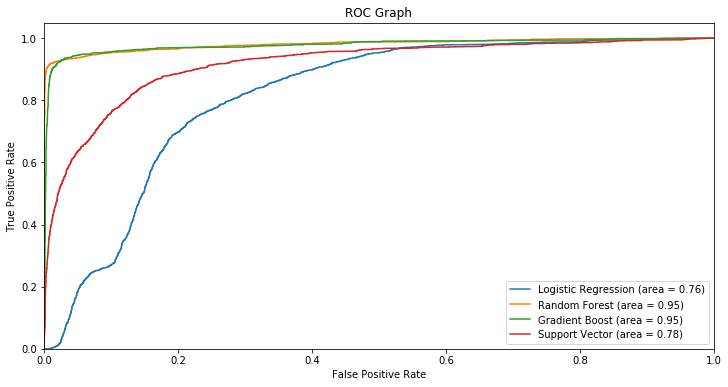

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Gradient Boosting ROC
plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boost (area = %0.2f)' % gbc_roc_auc)

# Plot Support Vector Machine ROC
plt.plot(svm_fpr, svm_tpr, label='Support Vector (area = %0.2f)' % svm_roc_auc)




plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

# Looking at some Predicted Values

In [ ]:
import pandas as pd 
prediction = GBC.predict(X_test)
predicted_values = pd.DataFrame(prediction, columns = ['turnover'])
predicted_values


,turnover
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,0


In [ ]:
df_1 = pd.DataFrame(list(zip(y_test, prediction)), columns =['Original_turnover', 'Predicted_turnover'])
df_1

,Original_turnover,Predicted_turnover
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,1,1
9,0,0


In [ ]:

# example of training a final classification model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets.samples_generator import make_blobs
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=9, random_state=0)
# fit final model
model = GradientBoostingClassifier()
model.fit(X, y)
# new instances where we do not know the answer
Xnew, _ = make_blobs(n_samples=5, centers=2, n_features=9, random_state=0)
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

X=[-3.22663618  6.22140326  0.06709326  0.18025904  8.48375054 -8.15094697
 -8.19089678 -9.29316015  6.01807482], Predicted=1
X=[ 1.42013331  4.63746165  3.54934659  0.6925054  -1.21383631  2.06378652
 -3.80124559  8.48907861 10.13769141], Predicted=0
X=[ 0.23410506  6.57354195  0.60090185  0.94342218 -1.71408786  4.45066148
  0.221103    7.99040744  9.65141773], Predicted=0
X=[ 0.08848433  2.32299086  1.70735537  1.05401263 -0.29661333  4.12026211
 -1.63558259  7.53315727  8.22470224], Predicted=0
X=[ -3.75118756   4.12823057   2.52867379   0.85123904   8.07385846
  -9.8320742   -7.47992365 -11.2095299    6.43965663], Predicted=1


# Visualising the Decision Tree

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Limit max depth
model = RandomForestClassifier(max_depth = 3, n_estimators=10)

# Train
model.fit(X_train,y_train)
# Extract single tree
estimator_limited = model.estimators_[5]
estimator_limited

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1246354977, splitter='best')

In [ ]:
# No max depth
model = RandomForestClassifier(max_depth = None, n_estimators=10)
model.fit(X_train,y_train)
estimator_nonlimited = model.estimators_[5]

Export Tree as .dot File
Use the export_graphviz functionality in scikit-learn

In [ ]:
from sklearn.tree import export_graphviz
target = {0: 'stayed',1: 'Left'}
export_graphviz(estimator_limited, out_file='tree_limited.dot', feature_names = X.columns,
                class_names = target, rounded = True, proportion = False, precision = 2, filled = True )

AttributeError: ignored

In [ ]:
export_graphviz(estimator_nonlimited, out_file='tree_nonlimited.dot', feature_names = X.columns,
                class_names = target,
                rounded = True, proportion = False, precision = 2, filled = True)

In [ ]:
!dot -Tpng tree_limited.dot -o tree_limited.png -Gdpi=600 #Convert to png from the command line
# Use the dot utility (may need to install on your computer). You can change the options, but the only one I have altered is the dots per inch (resolution)

In [ ]:
from IPython.display import Image
Image(filename = 'tree_limited.png')

In [ ]:
!pip install numpy